In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [3]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
%%R

# My commonly used R imports

require('tidyverse')
library(ggbump)

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0     ✔ purrr   0.3.5
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [5]:
%%R
 
# Import data with R
merged <- read_csv('Merged.csv', show_col_types = FALSE)
merged %>% head(4)

New names:
• `` -> `...1`
# A tibble: 4 × 13
   ...1 Driver    Name_x URL_x Year_x Race_…¹ DNG_R…² Match Unnam…³ Serial URL_y
  <dbl> <chr>     <chr>  <chr>  <dbl> <chr>   <chr>   <chr>   <dbl>  <dbl> <chr>
1  1050 Tommi Mä… Rally… /ent…   2000 1       "Null"  108-…       0      1 /fin…
2   415 Carlos S… Rally… /ent…   2000 2       "Null"  108-…       0      1 /fin…
3   474 Colin Mc… Rally… /ent…   2000 DNF     "<div … 108-…       0      1 /fin…
4   414 Carlos S… Inter… /ent…   2000 DNF     "<div … 109-…       1      2 /fin…
# … with 2 more variables: Name_y <chr>, Year_y <dbl>, and abbreviated variable
#   names ¹​Race_Result, ²​DNG_Reason, ³​`Unnamed: 0`
# ℹ Use `colnames()` to see all variable names


In [6]:
# Import data in python
merged = pd.read_csv('Merged.csv', na_values = ['DNF'])
merged.head()

Unnamed: 0.1         Driver                         Name_x  \
0          1050  Tommi Mäkinen  Rallye Automobile Monte-Carlo   
1           415   Carlos Sainz  Rallye Automobile Monte-Carlo   
2           474    Colin McRae  Rallye Automobile Monte-Carlo   
3           414   Carlos Sainz    International Swedish Rally   
4           473    Colin McRae    International Swedish Rally   

                                               URL_x  Year_x  Race_Result  \
0  /entryinfo/108-rallye-automobile-monte-carlo-2...    2000          1.0   
1  /entryinfo/108-rallye-automobile-monte-carlo-2...    2000          2.0   
2  /entryinfo/108-rallye-automobile-monte-carlo-2...    2000          NaN   
3  /entryinfo/109-international-swedish-rally-200...    2000          NaN   
4  /entryinfo/109-international-swedish-rally-200...    2000          3.0   

                                          DNG_Reason  \
0                                               Null   
1                                               Null   
2  <div class="profile-start-ret text-danger font...   
3  <div class="profile-start-ret text-danger font...   
4                                               Null   

                                    Match  Unnamed: 0  Serial  \
0  108-rallye-automobile-monte-carlo-2000         0.0     1.0   
1  108-rallye-automobile-monte-carlo-2000         0.0     1.0   
2  108-rallye-automobile-monte-carlo-2000         0.0     1.0   
3    109-international-swedish-rally-2000         1.0     2.0   
4    109-international-swedish-rally-2000         1.0     2.0   

                                            URL_y  \
0  /final/108-rallye-automobile-monte-carlo-2000/   
1  /final/108-rallye-automobile-monte-carlo-2000/   
2  /final/108-rallye-automobile-monte-carlo-2000/   
3    /final/109-international-swedish-rally-2000/   
4    /final/109-international-swedish-rally-2000/   

                                   Name_y  Year_y  
0  108-rallye-automobile-monte-carlo-2000  2000.0  
1  108-rallye-automobile-monte-carlo-2000  2000.0  
2  108-rallye-automobile-monte-carlo-2000  2000.0  
3    109-international-swedish-rally-2000  2000.0  
4    109-international-swedish-rally-2000  2000.0

In [7]:
merged['Race_Result']

0       1.0
1       2.0
2       NaN
3       NaN
4       3.0
       ... 
1046    3.0
1047    1.0
1048    3.0
1049    5.0
1050    NaN
Name: Race_Result, Length: 1051, dtype: float64

In [8]:
!ls

1. Scraping Data (Sébastien_Loeb).ipynb
1. Scraping Data (Sébastien_Ogier).ipynb
2. Some basic career analysis (Seb Loeb).ipynb
2. Some basic career analysis (Seb Ogier).ipynb
3. Scrape all the race info.ipynb
4. All careers.ipynb
5. Building the timeline viz.ipynb
5. Timeline viz with altair.ipynb
6. Smaller Comparison Viz.ipynb
All_scores.csv
Merged.csv
Other_Drivers
Sébastien_Loeb.csv
Sébastien_Ogier.csv
for_website
illustration
index.html
long_merged.csv
merged_data.csv
race_list.csv


In [9]:
%%R

merged$Driver <- as.factor(merged$Driver)

In [10]:
%%R

merged

# A tibble: 1,051 × 13
    ...1 Driver   Name_x URL_x Year_x Race_…¹ DNG_R…² Match Unnam…³ Serial URL_y
   <dbl> <fct>    <chr>  <chr>  <dbl> <chr>   <chr>   <chr>   <dbl>  <dbl> <chr>
 1  1050 Tommi M… Rally… /ent…   2000 1       "Null"  108-…       0      1 /fin…
 2   415 Carlos … Rally… /ent…   2000 2       "Null"  108-…       0      1 /fin…
 3   474 Colin M… Rally… /ent…   2000 DNF     "<div … 108-…       0      1 /fin…
 4   414 Carlos … Inter… /ent…   2000 DNF     "<div … 109-…       1      2 /fin…
 5   473 Colin M… Inter… /ent…   2000 3       "Null"  109-…       1      2 /fin…
 6  1049 Tommi M… Inter… /ent…   2000 2       "Null"  109-…       1      2 /fin…
 7  1048 Tommi M… Samee… /ent…   2000 DNF     "<div … 110-…       2      3 /fin…
 8   413 Carlos … Samee… /ent…   2000 4       "Null"  110-…       2      3 /fin…
 9   472 Colin M… Samee… /ent…   2000 DNF     "<div … 110-…       2      3 /fin…
10   471 Colin M… TAP R… /ent…   2000 DNF     "<div … 111-…       3      4 /fin…
# … w

In [11]:
merged

Unnamed: 0.1            Driver  \
0             1050     Tommi Mäkinen   
1              415      Carlos Sainz   
2              474       Colin McRae   
3              414      Carlos Sainz   
4              473       Colin McRae   
...            ...               ...   
1046           859  Thierry Neuville   
1047           738         Ott Tänak   
1048           858  Thierry Neuville   
1049           475       Elfyn Evans   
1050           174    Sébastien Loeb   

                                                 Name_x  \
0                         Rallye Automobile Monte-Carlo   
1                         Rallye Automobile Monte-Carlo   
2                         Rallye Automobile Monte-Carlo   
3                           International Swedish Rally   
4                           International Swedish Rally   
...                                                 ...   
1046                      Rallye Automobile Monte-Carlo   
1047                                       Rally Sweden   
1048                                       Rally Sweden   
1049                                       Rally Sweden   
1050  Rallye Catalunya - Costa Brava - Rallye de España   

                                                  URL_x  Year_x  Race_Result  \
0     /entryinfo/108-rallye-automobile-monte-carlo-2...    2000          1.0   
1     /entryinfo/108-rallye-automobile-monte-carlo-2...    2000          2.0   
2     /entryinfo/108-rallye-automobile-monte-carlo-2...    2000          NaN   
3     /entryinfo/109-international-swedish-rally-200...    2000          NaN   
4     /entryinfo/109-international-swedish-rally-200...    2000          3.0   
...                                                 ...     ...          ...   
1046  /entryinfo/77787-rallye-automobile-monte-carlo...    2023          3.0   
1047        /entryinfo/79247-rally-sweden-2023/3608287/    2023          1.0   
1048        /entryinfo/79247-rally-sweden-2023/3608291/    2023          3.0   
1049        /entryinfo/79247-rally-sweden-2023/3608292/    2023          5.0   
1050  /entryinfo/126-rallye-catalunya-costa-brava-ra...    1999          NaN   

                                             DNG_Reason  \
0                                                  Null   
1                                                  Null   
2     <div class="profile-start-ret text-danger font...   
3     <div class="profile-start-ret text-danger font...   
4                                                  Null   
...                                                 ...   
1046                                               Null   
1047                                               Null   
1048                                               Null   
1049                                               Null   
1050  <div class="profile-start-ret text-danger font...   

                                                  Match  Unnamed: 0  Serial  \
0                108-rallye-automobile-monte-carlo-2000         0.0     1.0   
1                108-rallye-automobile-monte-carlo-2000         0.0     1.0   
2                108-rallye-automobile-monte-carlo-2000         0.0     1.0   
3                  109-international-swedish-rally-2000         1.0     2.0   
4                  109-international-swedish-rally-2000         1.0     2.0   
...                                                 ...         ...     ...   
1046           77787-rallye-automobile-monte-carlo-2023       309.0   310.0   
1047                            79247-rally-sweden-2023       310.0   311.0   
1048                            79247-rally-sweden-2023       310.0   311.0   
1049                            79247-rally-sweden-2023       310.0   311.0   
1050  126-rallye-catalunya-costa-brava-rallye-de-esp...         NaN     NaN   

                                                 URL_y  \
0       /final/108-rallye-automobile-monte-carlo-2000/   
1       /final/108-rallye-automobile-monte-carlo-2000/   
2       /final/108-rall

In [12]:
# merged.DNG_Reason.unique()

In [13]:
# Fill in "Did not Attend"

long_merged = merged[['Driver', 'Serial', 'Race_Result']]

long_merged = long_merged[long_merged.Serial.notna()]
long_merged = long_merged.pivot_table(index=['Driver'], columns='Serial', values='Race_Result').reset_index()
long_merged = long_merged.melt(id_vars=['Driver'],value_name='Race_Result' )

long_merged.to_csv('long_merged.csv', index=False)
long_merged
# long_merged.head(10)

Driver Serial  Race_Result
0         Carlos Sainz    1.0          2.0
1          Colin McRae    1.0          NaN
2          Elfyn Evans    1.0          NaN
3       Mikko Hirvonen    1.0          NaN
4            Ott Tänak    1.0          NaN
...                ...    ...          ...
2749         Ott Tänak  311.0          1.0
2750    Sébastien Loeb  311.0          NaN
2751   Sébastien Ogier  311.0          NaN
2752  Thierry Neuville  311.0          3.0
2753     Tommi Mäkinen  311.0          NaN

[2754 rows x 3 columns]

# Use Altair to try bump chart

In [14]:
import altair as alt
from vega_datasets import data
import pandas as pd

In [17]:
main_data = long_merged[(long_merged['Driver'] == 'Sébastien Loeb') | (long_merged['Driver'] == 'Sébastien Ogier')]
main_data

Driver Serial  Race_Result
5      Sébastien Loeb    1.0          NaN
6     Sébastien Ogier    1.0          NaN
14     Sébastien Loeb    2.0          NaN
15    Sébastien Ogier    2.0          NaN
23     Sébastien Loeb    3.0          NaN
...               ...    ...          ...
2733  Sébastien Ogier  309.0          4.0
2741   Sébastien Loeb  310.0          NaN
2742  Sébastien Ogier  310.0          1.0
2750   Sébastien Loeb  311.0          NaN
2751  Sébastien Ogier  311.0          NaN

[612 rows x 3 columns]

In [19]:
years = pd.read_csv('race_list.csv')
years

Unnamed: 0  Serial                                                URL  \
0             0       1     /final/108-rallye-automobile-monte-carlo-2000/   
1             1       2       /final/109-international-swedish-rally-2000/   
2             2       3         /final/110-sameer-safari-rally-kenya-2000/   
3             3       4            /final/111-tap-rallye-de-portugal-2000/   
4             4       5  /final/112-rallye-catalunya-costa-brava-rallye...   
..          ...     ...                                                ...   
317         317     318             /final/80241-secto-rally-finland-2023/   
318         318     319      /final/80243-eko-acropolis-rally-greece-2023/   
319         319     320               /final/80242-copec-rally-chile-2023/   
320         320     321            /final/80244-central-europe-rally-2023/   
321         321     322              /final/80245-forum8-rally-japan-2023/   

                                                  Name  Year  
0               108-rallye-automobile-monte-carlo-2000  2000  
1                 109-international-swedish-rally-2000  2000  
2                   110-sameer-safari-rally-kenya-2000  2000  
3                      111-tap-rallye-de-portugal-2000  2000  
4    112-rallye-catalunya-costa-brava-rallye-de-esp...  2000  
..                                                 ...   ...  
317                     80241-secto-rally-finland-2023  2023  
318              80243-eko-acropolis-rally-greece-2023  2023  
319                       80242-copec-rally-chile-2023  2023  
320                    80244-central-europe-rally-2023  2023  
321                      80245-forum8-rally-japan-2023  2023  

[322 rows x 5 columns]

In [55]:
merged_data = main_data.merge(years[['Serial', 'Name', 'Year']], on='Serial', how='left')
merged_data.tail(50)

Driver Serial  Race_Result  \
562   Sébastien Loeb  287.0          NaN   
563  Sébastien Ogier  287.0          1.0   
564   Sébastien Loeb  288.0          NaN   
565  Sébastien Ogier  288.0          3.0   
566   Sébastien Loeb  289.0          NaN   
567  Sébastien Ogier  289.0          1.0   
568   Sébastien Loeb  290.0          NaN   
569  Sébastien Ogier  290.0          1.0   
570   Sébastien Loeb  291.0          NaN   
571  Sébastien Ogier  291.0          4.0   
572   Sébastien Loeb  292.0          NaN   
573  Sébastien Ogier  292.0          5.0   
574   Sébastien Loeb  293.0          NaN   
575  Sébastien Ogier  293.0          3.0   
576   Sébastien Loeb  294.0          NaN   
577  Sébastien Ogier  294.0          5.0   
578   Sébastien Loeb  295.0          NaN   
579  Sébastien Ogier  295.0          4.0   
580   Sébastien Loeb  296.0          NaN   
581  Sébastien Ogier  296.0          1.0   
582   Sébastien Loeb  297.0          1.0   
583  Sébastien Ogier  297.0          2.0   
584   Sébastien Loeb  298.0          NaN   
585  Sébastien Ogier  298.0          NaN   
586   Sébastien Loeb  299.0          NaN   
587  Sébastien Ogier  299.0          NaN   
588   Sébastien Loeb  300.0          NaN   
589  Sébastien Ogier  300.0          5.0   
590   Sébastien Loeb  301.0          NaN   
591  Sébastien Ogier  301.0          NaN   
592   Sébastien Loeb  302.0          8.0   
593  Sébastien Ogier  302.0          4.0   
594   Sébastien Loeb  303.0          NaN   
595  Sébastien Ogier  303.0          NaN   
596   Sébastien Loeb  304.0          NaN   
597  Sébastien Ogier  304.0          NaN   
598   Sébastien Loeb  305.0          NaN   
599  Sébastien Ogier  305.0          NaN   
600   Sébastien Loeb  306.0          NaN   
601  Sébastien Ogier  306.0          NaN   
602   Sébastien Loeb  307.0          NaN   
603  Sébastien Ogier  307.0          2.0   
604   Sébastien Loeb  308.0          NaN   
605  Sébastien Ogier  308.0          1.0   
606   Sébastien Loeb  309.0          NaN   
607  Sébastien Ogier  309.0          4.0   
608   Sébastien Loeb  310.0          NaN   
609  Sébastien Ogier  310.0          1.0   
610   Sébastien Loeb  311.0          NaN   
611  Sébastien Ogier  311.0          NaN   

                                             Name  Year  
562                      67214-croatia-rally-2021  2021  
563                      67214-croatia-rally-2021  2021  
564         68111-vodafone-rally-de-portugal-2021  2021  
565         68111-vodafone-rally-de-portugal-2021  2021  
566              68112-rally-italia-sardegna-2021  2021  
567              68112-rally-italia-sardegna-2021  2021  
568                 68113-safari-rally-kenya-2021  2021  
569                 68113-safari-rally-kenya-2021  2021  
570                      68114-rally-estonia-2021  2021  
571                      68114-rally-estonia-2021  2021  
572        69179-renties-ypres-rally-belgium-2021  2021  
573        69179-renties-ypres-rally-belgium-2021  2021  
574        71264-eko-acropolis-rally-of-gods-2021  2021  
575        71264-eko-acropolis-rally-of-gods-2021  2021  
576                68115-secto-rally-finland-2021  2021  
577                68115-secto-rally-finland-2021  2021  
578  68118-rallyracc-catalunya-costa-daurada-2021  2021  
579  68118-rallyracc-catalunya-costa-daurada-2021  2021  
580             72918-forum8-aci-rally-monza-2021  2021  
581             72918-forum8-aci-rally-monza-2021  2021  
582      72281-rallye-automobile-monte-carlo-2022  2022  
583      72281-rallye-automobile-monte-carlo-2022  2022  
584                       72282-rally-sweden-2022  2022  
585                       72282-rally-sweden-2022  2022  
586                      73359-croatia-rally-2022  2022  
587                      73359-croatia-rally-2022  2022  
588         73360-vodafone-rally-de-portugal-2022  2022  
589         73360-vodafone-rally-de-portugal-2022  2022  
590              73361-rally-italia-sardegna-2022  2022  
591              73361-rally-

In [69]:




chart = alt.Chart(merged_data).mark_line(point=alt.OverlayMarkDef(size=30)).encode(
    x=alt.X("Serial", title="Races"),
    y=alt.Y("Race_Result", scale=alt.Scale(reverse=False)),
    color=alt.Color("Driver", scale=alt.Scale(domain=["Sébastien Loeb", "Sébastien Ogier"], range=["#fc3b2b", "#1d98ca"]))
).transform_window(
    rank='rank(Race_Result)',
    sort=[alt.SortField("Race_Result", order="ascending")]
).properties(
    width=1000,
    height=300,
)


bars = alt.Chart(merged_data[merged_data['Year'] % 2 == 0]).mark_rect(
        color='gray', opacity=0.1
    ).encode(
        x='min(Serial)',
        x2='max(Serial)',
        color = 'Year',
        tooltip = ['Year','max(Serial)']
    ).properties(
    title="Bump Chart for Stock Prices",
    width=1000,
    height=300,
)

# create a layer chart to add background mark for even years
layered_chart = alt.layer(
    chart, bars

)

# display the chart
layered_chart.configure_axis(grid=False)  # turn off grid lines




alt.LayerChart(...)

Rows: 2754 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Driver
dbl (2): Serial, Race_Result

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


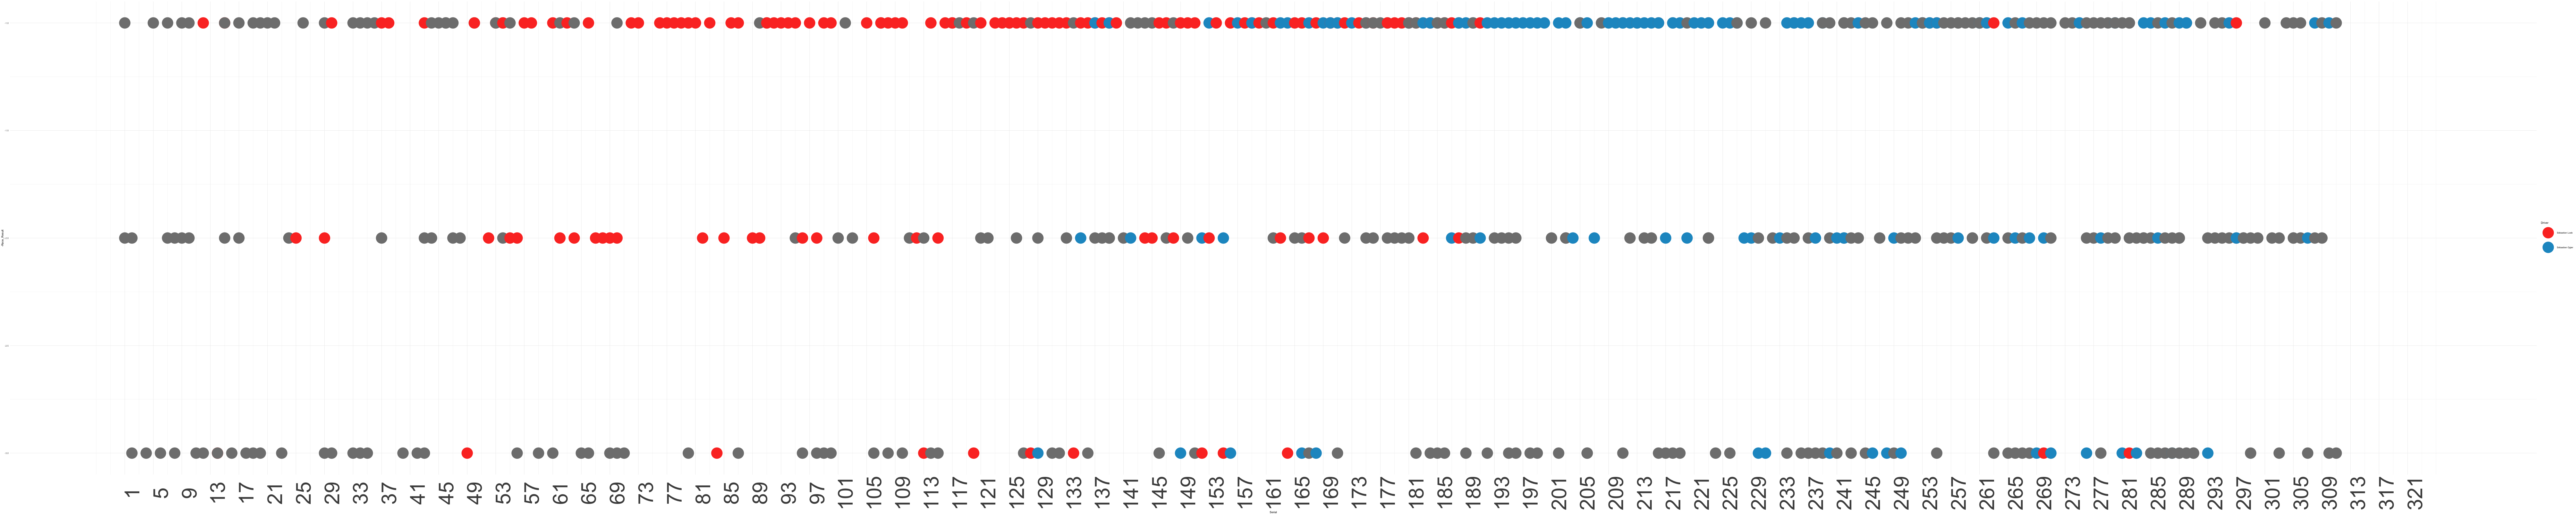

In [262]:
%%R -w 10000 -h 2000 

# Define the colors for each driver
driver_colors <- c("Sébastien Loeb" = "#fc3b2b", "Sébastien Ogier" = "#1d98ca")
other_color <- "#F2F2F2"

long_merged <- read_csv('long_merged.csv')


ggplot(long_merged %>% filter(Race_Result<=3)) +
    aes(x = Serial, y = -Race_Result, group = Driver, color = Driver) +
    geom_point(size=20) +
#     geom_line(size=4) +
    scale_color_manual(values = c(driver_colors, other_color)) +
    scale_x_continuous(limits = c(1, 323), breaks = seq(1, 323, 4)) +
#     geom_bump(na.rm=FALSE) +
#     facet_wrap(~Driver %in% c('Sébastien Loeb','Sébastien Ogier'), nrow=2) +
    theme_minimal() +
    theme(axis.text.x=element_text(size=80, angle=90))

In [64]:
merged.query("Driver=='Sébastien Loeb'").sort_values(by='Serial').tail(20)

...1          Driver  \
571    18.0  Sébastien Loeb   
581    17.0  Sébastien Loeb   
601    16.0  Sébastien Loeb   
667    15.0  Sébastien Loeb   
816    14.0  Sébastien Loeb   
822    13.0  Sébastien Loeb   
854    12.0  Sébastien Loeb   
863    11.0  Sébastien Loeb   
872    10.0  Sébastien Loeb   
880     9.0  Sébastien Loeb   
890     8.0  Sébastien Loeb   
893     7.0  Sébastien Loeb   
917     6.0  Sébastien Loeb   
922     5.0  Sébastien Loeb   
937     4.0  Sébastien Loeb   
998     3.0  Sébastien Loeb   
1010    2.0  Sébastien Loeb   
1018    1.0  Sébastien Loeb   
1028    0.0  Sébastien Loeb   
1051  174.0  Sébastien Loeb   

                                                 Name_x  \
571                                        Rally Sweden   
581                         Philips LED Rally Argentina   
601                           Rallye de France - Alsace   
667                       Rallye Automobile Monte-Carlo   
816                             Rally Guanajuato Mexico   
822                         CORSICA Linea Tour de Corse   
854                 RallyRACC Catalunya - Costa Daurada   
863                       Rallye Automobile Monte-Carlo   
872                                        Rally Sweden   
880                         CORSICA Linea Tour de Corse   
890                                   Copec Rally Chile   
893                          Vodafone Rally de Portugal   
917                 RallyRACC Catalunya - Costa Daurada   
922                       Rallye Automobile Monte-Carlo   
937                               Rally Turkey Marmaris   
998                       Rallye Automobile Monte-Carlo   
1010                         Vodafone Rally de Portugal   
1018                                 Safari Rally Kenya   
1028                         EKO Acropolis Rally Greece   
1051  Rallye Catalunya - Costa Brava - Rallye de España   

                                                  URL_x  Year_x Race_Result  \
571           /entryinfo/6532-rally-sweden-2013/244677/  2013.0           2   
581   /entryinfo/6535-philips-led-rally-argentina-20...  2013.0           1   
601   /entryinfo/6541-rallye-de-france-alsace-2013/3...  2013.0         DNF   
667   /entryinfo/18216-rallye-automobile-monte-carlo...  2015.0           8   
816   /entryinfo/44257-rally-guanajuato-mexico-2018/...  2018.0           5   
822   /entryinfo/44258-corsica-linea-tour-de-corse-2...  2018.0           1   
854   /entryinfo/44265-rallyracc-catalunya-costa-dau...  2018.0           1   
863   /entryinfo/52398-rallye-automobile-monte-carlo...  2019.0           4   
872         /entryinfo/53052-rally-sweden-2019/2084224/  2019.0           7   
880   /entryinfo/54464-corsica-linea-tour-de-corse-2...  2019.0           8   
890    /entryinfo/54463-copec-rally-chile-2019/2207914/  2019.0           3   
893   /entryinfo/54466-vodafone-rally-de-portugal-20...  2019.0         DNF   
917   /entryinfo/54472-rallyracc-catalunya-costa-dau...  2019.0           4   
922   /entryinfo/59972-rallye-automobile-monte-carlo...  2020.0           6   
937   /entryinfo/60436-rally-turkey-marmaris-2020/27...  2020.0           3   
998   /entryinfo/72281-rallye-automobile-monte-carlo...  2022.0           1   
1010  /entryinfo/73360-vodafone-rally-de-portugal-20...  2022.0         DNF   
1018  /entryinfo/73362-safari-rally-kenya-2022/3373957/  2022.0           8   
1028  /entryinfo/73366-eko-acropolis-rally-greece-20...  2022.0         DNF   
1051  /entryinfo/126-rallye-catalunya-costa-brava-ra...  1999.0         DNF   

                                             DNG_Reason  \
571                                                Null   
581                                                Null   
601   <div class="profile-start-ret text-danger font...   
667                                                Null   
816                                                Null   
822                                                Null   
854                                       

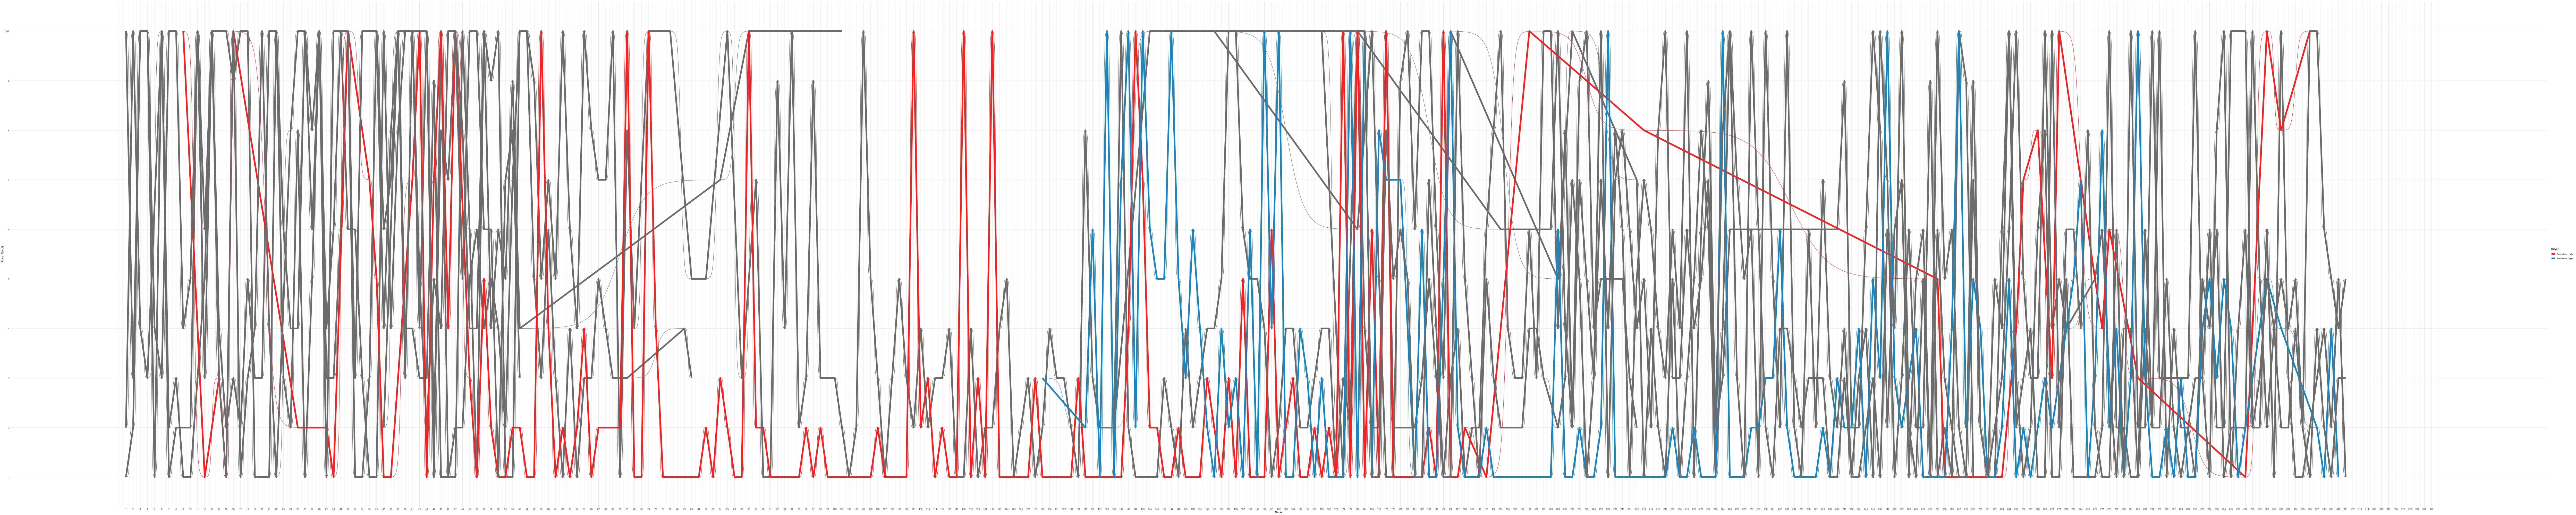

In [12]:
%%R -w 10000 -h 2000

# Define the colors for each driver
driver_colors <- c("Sébastien Loeb" = "#fc3b2b", "Sébastien Ogier" = "#1d98ca")
other_color <- "#F2F2F2"


idx <- c(1, diff(merged$Serial))
i2 <- c(1,which(idx != 1), nrow(merged)+1)
merged$grp <- rep(1:length(diff(i2)), diff(i2))


ggplot(merged) +
  theme_minimal() +
  aes(x = Serial, y = Race_Result, group = Driver, color = Driver) +
  geom_line(size=3, na.rm = TRUE) +
  scale_color_manual(values = c(driver_colors, other_color)) +
  scale_x_continuous(limits = c(1, 323), breaks = seq(1, 323, 1)) +
  geom_bump(na.rm=TRUE)
